# **Predicción del desempeño estudiantil - Pre-entrega 1**

## **Objetivos**
### Los objetivos del analisis del presente DataSet de desempeño estudiantil son:
- Determinar cuales son las caracteristicas y factores que influyen de forma significativa en la determinación de la variable objetivo GradeClass.
- Clasificar a los estudiantes en grupos segun sus rendimiento academico, identificando patrones comunes dentro de cada grupo en relación con sus habitos de estudios, participacón en actividades extracurriculares y otras caracteristicas.
- Analizar la correlación entre las diferentes variables independientes y la variable ojetivo GradeClass para comprender mejor las relaciones entre los hábitos de estudio, la participación de los padres, las actividades extracurriculares y el rendimiento academico.
- Desarrollar modelos predictivos que permiten estimar la variable objetivo GradeClass de un estudiante.

## **Hipotesis**
### Las hipotesis del analisis del presente DataSet de desempeño estudiantil son:
1) Los estudiantes que dedican mas horas al estudio tienen un rendimiento académico (GradeClass) superior en comparación con aquellos que dedican menos tiempo.
2) La participación en actividades extracurriculares esta positivamente relacionada con un mejor rendimiento académico.
3) Los estudiantes que reciben apoyo familiar constante en sus estudios tienen un rendimiento academico (GradeClass) superior en comparación con aquellos que no lo reciben.
4) La asistencia regular a clases y la participación activa en ellas estan relacionadas positivamente con el rendimiento academico

## **Definición de variables**

### Este database esta compuesto por la información recopilada de 2392 estudiantes de secundaria. Don de se puede ver y evaluar habitos de estudio, caracteristicas demograficas, participación de padres, actividades extracurriculares y rendimiento academico.
##### Las variables a estudiar son:

- StudentID: Un identificador unico para cada estudiante (1001 a 3392).
- Edad: LA edad de los estudiantes oscila entre los 15 y los 18 años.
- Género: de los estudiantes, 0 = masculino y 1 = femenino.
- Etnicidad: La etnicidad de los estudiantes, codificada de la siguiente forma: 0 = Caucásico, 1 = Afroamericano, 2 = Asiático y 3 = Otros.
- Educación de los padres: El nivel de educación de los padres, codificado de la siguiente forma: 0 = Ninguno, 1 = Escuela secundaria, 2 = Universidad incompleta, 3 = Licenciatura y 4 = Superior.
- StudyTimeWeekly: Tiempo de estudio semanal en horas, de 0 a 20.
- Ausencias: Número de ausencias durante el año escolar, comprendido entre 0 y 30.
- Tutoría: Estado de la tutoría, 0 = No y 1 = Si.
- ParentalSupport: El nivel de apoyo de los padres, 0 = Ninguno, 1 = Bajo, 2 = Moderado, 3 = Alto y 4 = Muy Alto.
- Extracurricular: Participación en actividades extracurriculares, donde 0 = No y 1 = Si.
- Deportes: Participación en deportes, 0 = No y 1 = Si.
- Musica: Participación en actividades musicales, 0 = No y 1 = Si.
- Voluntariado: Participación en actividades de voluntariado, 0 = No y 1 = Si.
- GPA: Promedio de clasificaciones en la escuela en una escala de 2.0 a 4.0, influenciado por los habitos de estudio, la participación de los padres y las actividades extracurriculares.
- VARIABLE OBJETIVO GRADERCLASS
- GradeClass: Clasificación de las calificaciones de los estudiantes segun el GPA.
- 0 = A (GPA >= 3.5)
- 1 = B (3.0 <= GPA < 3.5)
- 2 = C (2.5 <= GPA < 3.0)
- 3 = D (2.0 <= GPA < 2.5)
- 4 = F (GPA < 2.0)

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Se carga el DataFrame para comenzar el analisis.

In [34]:
df=pd.read_csv('C:/Users/Sergio/Desktop/CIencia de datos/Trabajo final/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Se realizá una descripción general del tipo de variables.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GradeClass         2392 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 261.8 KB


Se utiliza el metodo describe() para obtener una visión estadistica general y rápida de los datos.

In [42]:
df.describe().round(1)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0,2392.0
mean,2196.5,16.5,0.5,0.9,1.7,9.8,14.5,0.3,2.1,0.4,0.3,0.2,0.2,1.9,3.0
std,690.7,1.1,0.5,1.0,1.0,5.7,8.5,0.5,1.1,0.5,0.5,0.4,0.4,0.9,1.2
min,1001.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1598.8,15.0,0.0,0.0,1.0,5.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.2,2.0
50%,2196.5,16.0,1.0,0.0,2.0,9.7,15.0,0.0,2.0,0.0,0.0,0.0,0.0,1.9,4.0
75%,2794.2,17.0,1.0,2.0,2.0,14.4,22.0,1.0,3.0,1.0,1.0,0.0,0.0,2.6,4.0
max,3392.0,18.0,1.0,3.0,4.0,20.0,29.0,1.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0


Como la variable objetivo se calcula directamente con la variable GPA, ambas ofrecen la misma información por lo tanto se prodria prescindir de esta ultima variable. Se procede a borrarla.

In [50]:
df = df.drop(columns='GPA')
df.shape

(2392, 14)

### Las primeras observaciones que se pueden hacer de los datos contenidos en el DataFrame son:


- Todas las variables que componenen el set de datos son numericas y no nulas.
- La edad promedio de los estudiantes analizados es de 16.5 años, con un rango de 16 a 18 años.
- El 50% de los estudiantes es de origen caucasico.
- El promedio de horas de estudio por día es de 9.8 hs.
- Las variable GPA y GradeClass son equivalentes, por eso no es necesario tenerla a las dos en el analisis.
- Nos quedan un Dataset de 14 columnas.

### Se procede a realizar analisis graficos de las variables

In [139]:
# Creo los df para ver las variables que planteamos en las hipotesis pueden ser las más importantes
df_tutoria = df['Tutoring'].value_counts().rename({1: 'Sí', 0: 'No'}).reset_index()
df_tutoria

,Tutoring,count
0,No,1671
1,Sí,721


<Axes: xlabel='Tutoring', ylabel='count'>

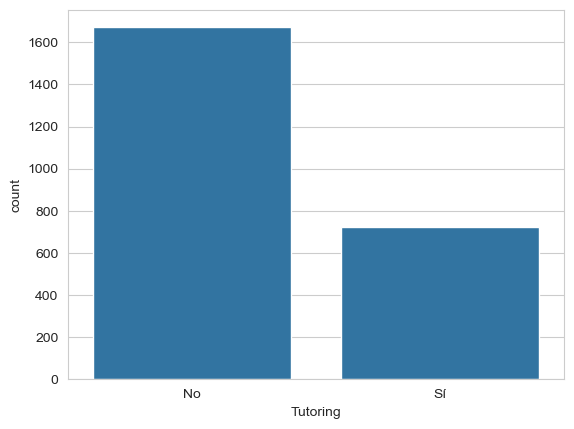

In [135]:
sns.set_style()
sns.barplot(x='Tutoring', y='count', data=df_tutoria, dodge=False, legend=False)

In [109]:
df_apoyo = df['ParentalSupport'].value_counts().rename({0: "Ninguno", 1: "Bajo", 2: "Moderado", 3: "Alto", 4: "Muy Alto"}).reset_index()
df_apoyo

,ParentalSupport,count
0,Moderado,740
1,Alto,697
2,Bajo,489
3,Muy Alto,254
4,Ninguno,212


<Axes: xlabel='ParentalSupport', ylabel='count'>

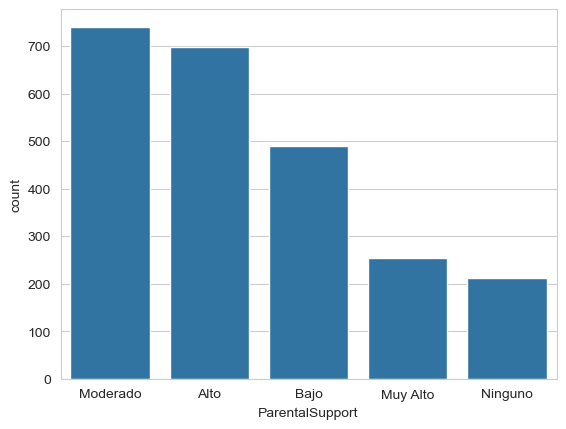

In [137]:
sns.set_style()
sns.barplot(x='ParentalSupport', y='count', data=df_apoyo)

<Axes: xlabel='Extracurricular', ylabel='count'>

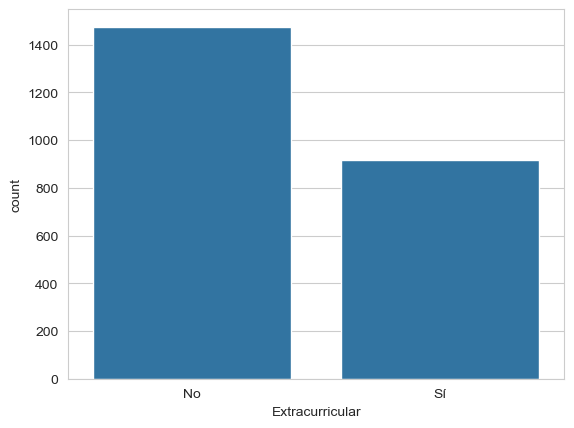

In [113]:
df_extracurricular = df['Extracurricular'].value_counts().rename({1: 'Sí', 0: 'No'}).reset_index()
df_extracurricular
sns.set_style()
sns.barplot(x='Extracurricular', y='count', data=df_extracurricular)

Dado que la mayoria de los estudiantes consultados para este analisis tienen apoyo moderado de los padres y no tienen turias o ralizan actividades extracurriculares, se procederá a analizar la interacción de estas variables con la objetivo. Para ello se utilizará una matriz de correlacón y un heatmap que permita identificar cuales son las variables que tienen mayor peso.

GradeClass           1.000000
Absences             0.728633
ParentalEducation    0.041031
Gender               0.022998
Volunteering         0.013156
Age                 -0.006250
Ethnicity           -0.023326
Sports              -0.026654
Music               -0.036065
Extracurricular     -0.069733
StudentID           -0.098500
Tutoring            -0.111695
StudyTimeWeekly     -0.134131
ParentalSupport     -0.136823
Name: GradeClass, dtype: float64


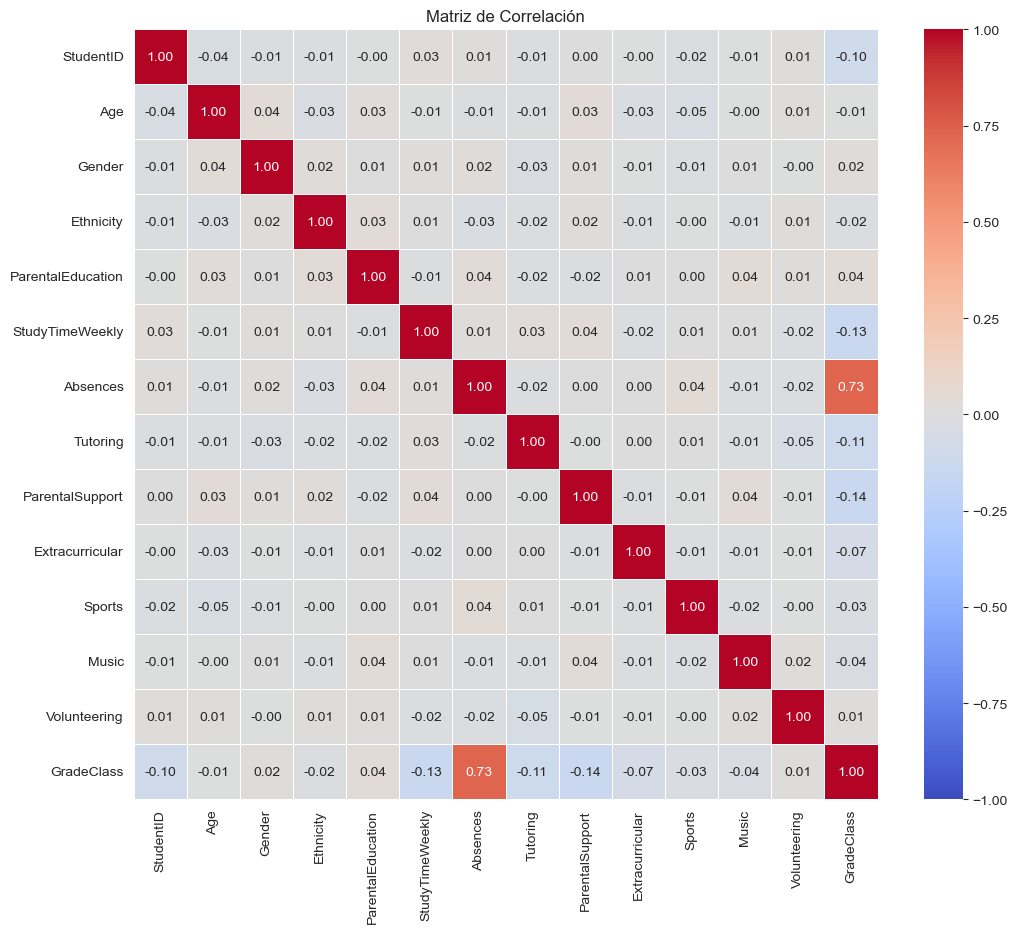

In [148]:
# Matriz de correlación para ver como inteactuan cada variable entre si y principalmente con la variable GraderClass
corr_GC_a = df.corr()
corr_GC = corr_GC_a['GradeClass'].sort_values(ascending=False)
print(corr_GC)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_GC_a, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## Correlación con GraderClass

- Ausencias: 0.73, se trata de una correlación positiva alta, es decir los dias de inasistencia de los alumnos impactan directamente en la nota final.
- Tutorias: -0.11, se trata de una correlación negativa leve, es decir que a medida que aumentan las tutorias disminuye el GraderClass y por lo tanto la calificación aumenta.
- StudyTimeWeekly: -0.13, al igual que la anterior tiene una correlación negativa leve.
- ParentalSupport: -0.14, identica a las 2 anteriores.
- El resto de las vatiables tienen correlaciones depreciables.

## Analizaremos los outliers

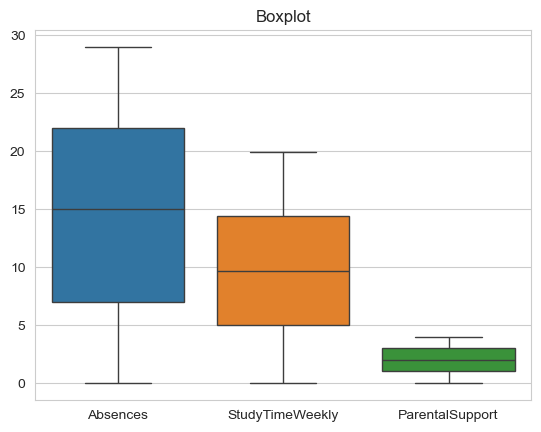

In [180]:
sns.boxplot(data = df[['Absences','StudyTimeWeekly','ParentalSupport']])
plt.title("Boxplot")
plt.show()

No se observan outliers que deban ser corregidos o eliminados del analisis.

## Histograma

Se grafican histogramas con las 3 variables que más peso tienen y de esta forma buscar ver las variabilidad de las mismas.

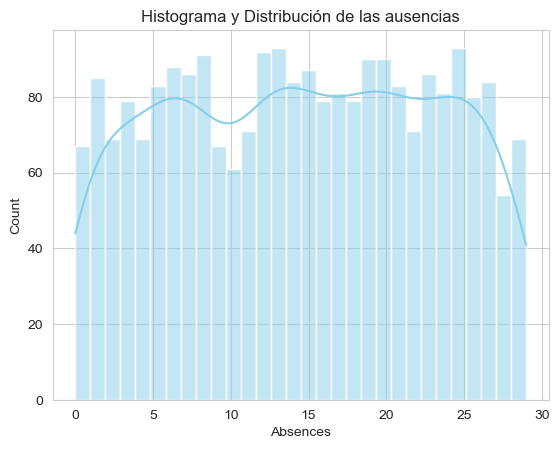

In [192]:
# Dibujar el histograma de las ausencias
sns.histplot(df['Absences'], kde=True, bins=30, color='skyblue')
plt.title("Histograma y Distribución de las ausencias")
plt.show()

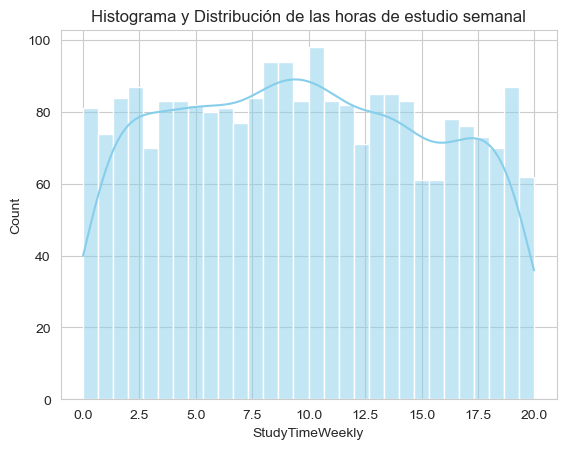

In [194]:
# Dibujar el histograma de las horas de estudio semanal
sns.histplot(df['StudyTimeWeekly'], kde=True, bins=30, color='skyblue')
plt.title("Histograma y Distribución de las horas de estudio semanal")
plt.show()

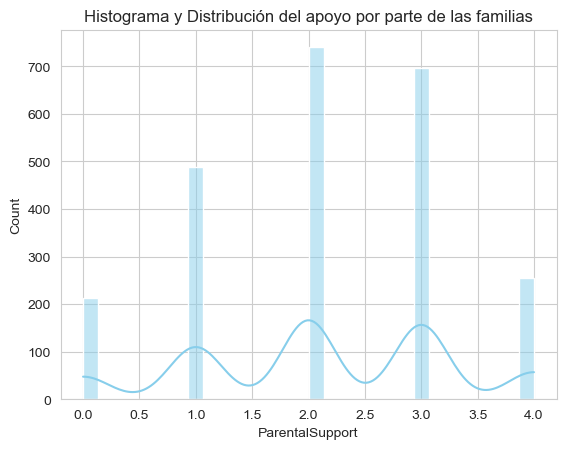

In [196]:
# Dibujar el histograma del apoyo familiar
sns.histplot(df['ParentalSupport'], kde=True, bins=30, color='skyblue')
plt.title("Histograma y Distribución del apoyo por parte de las familias")
plt.show()

La variable de inasistencias anuales es que mas variabilidad presenta.

### Variable GraderClass

Se procede a estudiar la relación entre la variable objetivo y la de inasistencia.

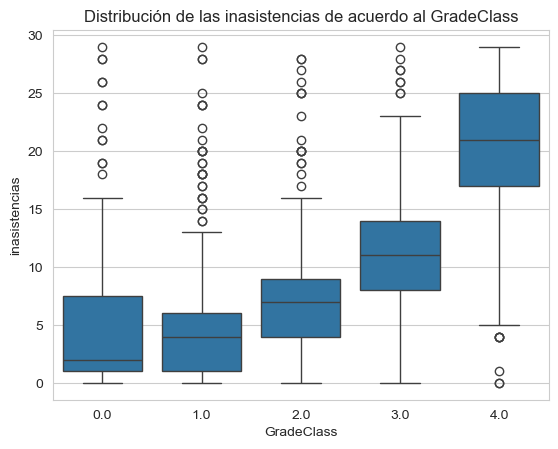

In [208]:
# Crear un boxplot considerando ambas variables
sns.boxplot(x='GradeClass', y='Absences', data=df)

plt.title("Distribución de las inasistencias de acuerdo al GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("inasistencias")

plt.show()

Se corrobora y se obseva graficamente los que se obtuvo en la matriz de correlación. Hay una fuerte relación entre la calificación y las inasistencia, mientras menores sean estas más probablemente se obtendra una A (GradeClass = 0) lo que corresponde a una mayor calificación.

Ahora se analiza la distribución de la variable GradeClass

<Axes: xlabel='GradeClass', ylabel='count'>

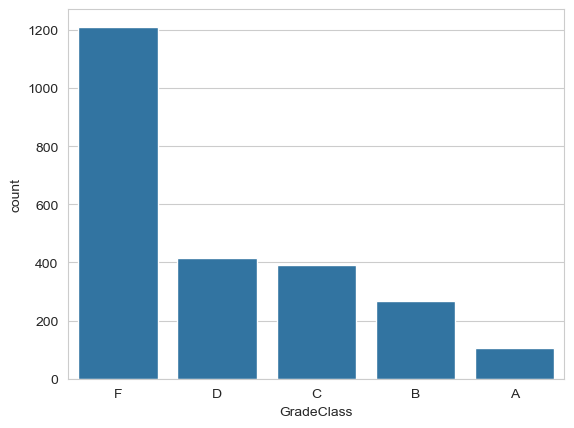

In [213]:
df_GradeClass = df['GradeClass'].value_counts().rename({0: 'A', 1: 'B', 2:'C', 3:'D', 4:'F'}).reset_index()
df_GradeClass
sns.set_style()
sns.barplot(x='GradeClass', y='count', data=df_GradeClass)

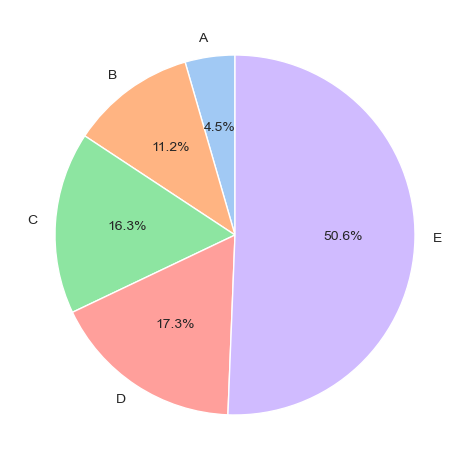

In [237]:
labels = ["A", "B", "C", "D", "E"]
ticks = range(len(labels))

# Calculos para el grafico de torta
grade_counts = df['GradeClass'].value_counts().sort_index()

# grafico de torta
plt.pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Gráfico de torta - Grade Class')

plt.tight_layout()
plt.show()


## Conclusiones parciales

- Solo 4.5% de los estudiantes evaluados llegan a tener una calificación de A.
- Se observa una fuerte relación entre las inasistencias y la variable objetivo/calificación.
- Variables que se presuponia podian llegar a ser determnante tales como actividades extracurriculares, se vio que no tienen practicamente peso sobre el resultado final.
- El tiempo que se dedica semanalmente al estudio como también el apoyo recibido en sus hogares favorece a la obtensión de una buena calificación.
- En principio se puedo observar que el set de datos estudiados permitiría entrenar un algoritmo de predicción, en el cual podríamos calcular cual es la nota final de acuerdo a estas variables de mayor peso.